# Summary:

After analysig the data and making clustering using Kmeans, I found that there are 4 clusters of customers. Each cluster has different characteristics and spending behavior. Here are the summary of each cluster:

**Cluster 1 -> High Affluent and High Spender**

* Family Portrait: This group of people tend not to have children, at most only 1 child in the family. Their ages are across all ranges.

* Spending Behavior: This group also don't tend to buy discounted products. They less likely to spend on website, they prefer shop in store and catalog. They like to buy wine and meats products.

**Cluster 2 -> Middle income and middle spend**

* Family Portrait: This group of people tend to have children, but more teenagers than young kids.
* Spending Behavior: This group of people love wine, they spend more than wine than any other groups. They also love to purchase discounted products. They spend more on website than any other groups.

**Cluster 0 -> Low income, low spend**

* Family Portrait: This group of people most likely to have children, both young kids and teenagers. Their average income is higher than cluster 3. 
* Spending Behavior: This groupf of people love buying wine, 66% of their spends is on wine product, they also love golds despite their low income.

**Cluster 3 -> Lowest income, low spend**

* Family Portrait: This group of people tend to have children, but more young kids than teenagers. This group of people are relative young compared to other groups
* Spending Behavior: This group of people doesn't spend that much - their spend are more balanced across all categories. Despite that their low income and spend, they love gold products than other clusters, also they spend slightly more on fish product than other groups. This group of people visited the website the most, but they don't buy much.


The dataset:
The dataset is from Kaggle project [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/code). 

The goal:
The goal is to segment the customers according to their spending behaviors. This is to practice clustering machine learning algorithms.

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# check for missing values -- this is more obvious than the previous step
df.isna().sum()[df.isna().sum() > 0]

Income    24
dtype: int64

In [6]:
df[pd.isna(df['Income'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:

df.duplicated().sum()

0

From the above:
* we can notice that Income has outliers, the max income is 666666.00, which is quite high compared to the rest of the data. We might need to deal with this later.
* Year_Birth has outliers too, the minimum year is 1893, which is quite old. We might need to deal with this later.

# Data Cleaning

From the above step, we can see that the data is already tidy. There are no duplicates, and the data types are mostly correct.

Only thing we need to do is to convert "Dt_Customer" to datetime type and deal with the income missing values.


In [10]:
# convert the date columns to datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

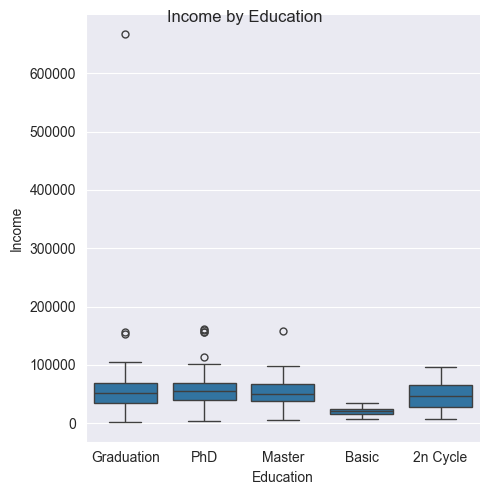

In [11]:
# lets look income by education, this might give us some insights how we can fill the missing values

d = sns.catplot(x='Education', y='Income', kind='box', data=df)
d.figure.set_size_inches(5, 5)
d.figure.suptitle('Income by Education')
plt.show()

In [12]:
# for missing income, we will fill it up with the median income of the respective education level
df.fillna(df[['Income', 'Education']].groupby('Education').transform('median'), inplace=True)

df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# EDA

In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

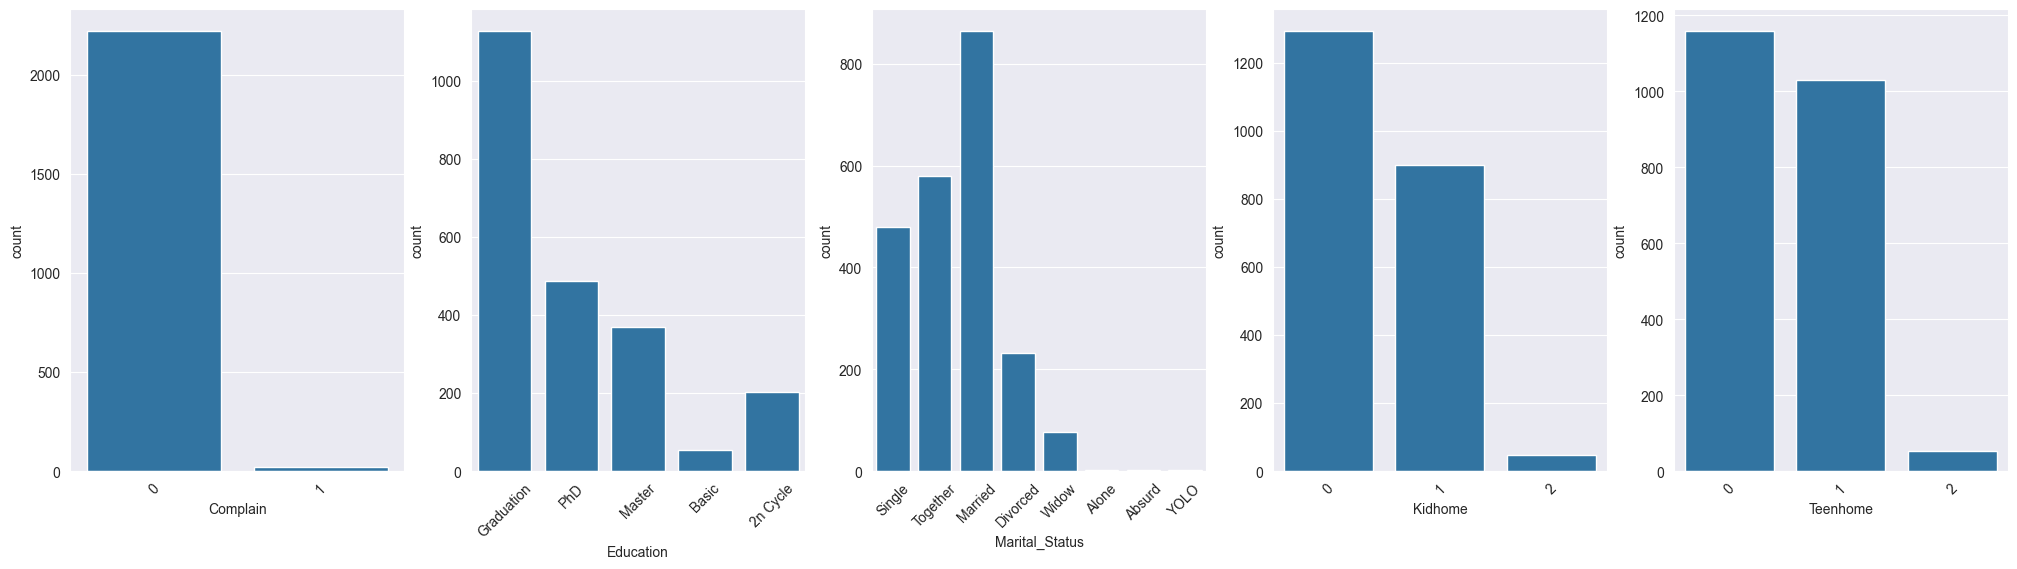

In [14]:
# lets look the features that are categorical
cal_cols = ['Complain', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']
fig, ax = plt.subplots(1, len(cal_cols), figsize=(25, 6))
for col in enumerate(cal_cols):
    sns.countplot(data=df, x=col[1], ax=ax[col[0]])
    # rotate the x-axis labels
    # ax[col[0]].xticks(rotation=45)
    ax[col[0]].tick_params(axis='x', rotation=45)
plt.show()

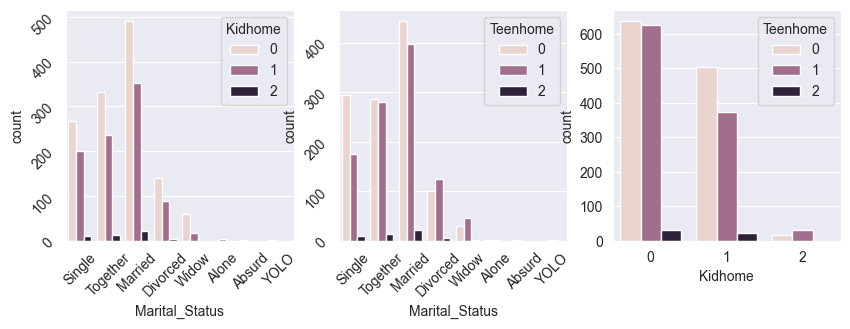

In [15]:
fig, ax = plt.subplots(1,3, figsize=(10, 3))
sns.countplot(data=df, x='Marital_Status', hue='Kidhome', ax=ax[0])
sns.countplot(data=df, x='Marital_Status', hue='Teenhome', ax=ax[1])
sns.countplot(data=df, x='Kidhome', hue='Teenhome', ax=ax[2])
ax[0].tick_params(rotation=45)
ax[1].tick_params(rotation=45)
plt.show()

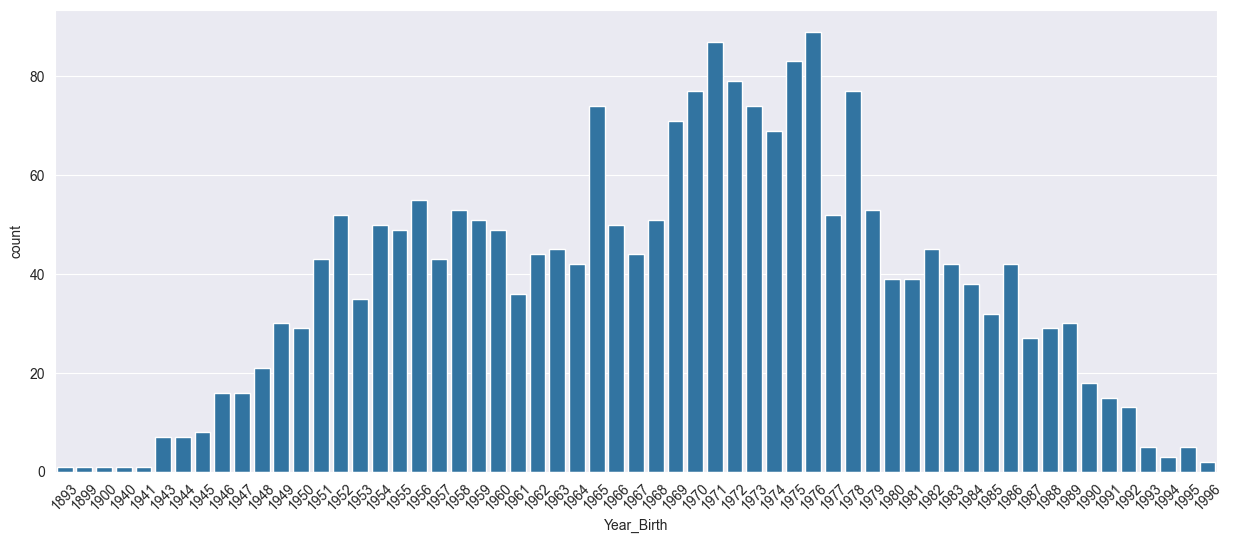

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=df, x='Year_Birth')
plt.xticks(rotation=45)
plt.show()

In [18]:
Age = []
Year = 2024
for item in df['Year_Birth']:
    Age.append(Year - item)

df.insert(0, 'Age', Age)

df.head()

,Age,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,67,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,70,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,59,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,40,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,43,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0


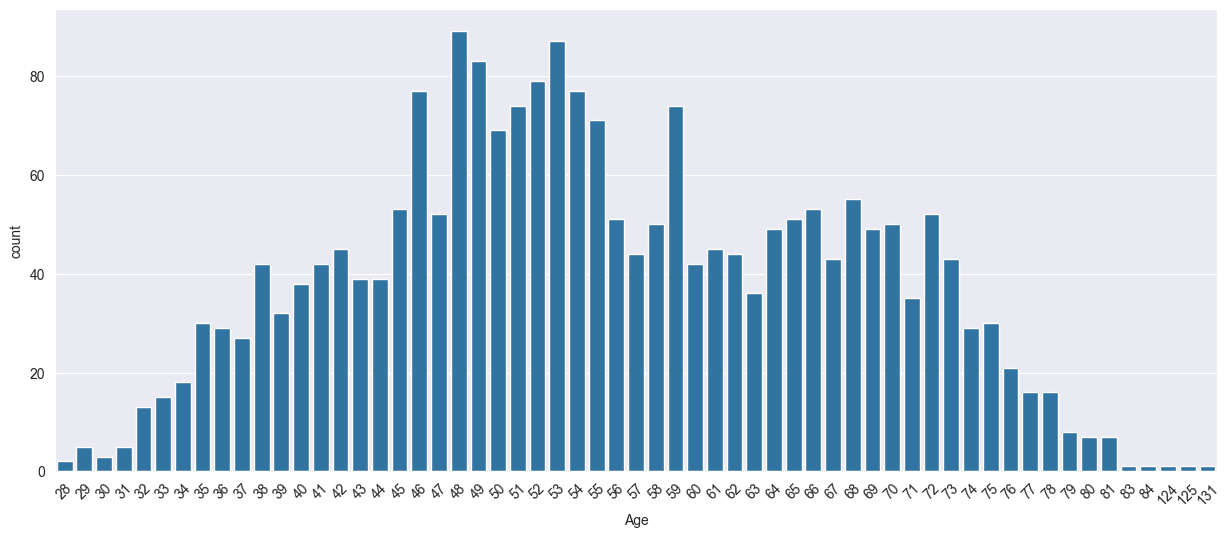

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(data=df, x='Age')
plt.xticks(rotation=45)
plt.show()

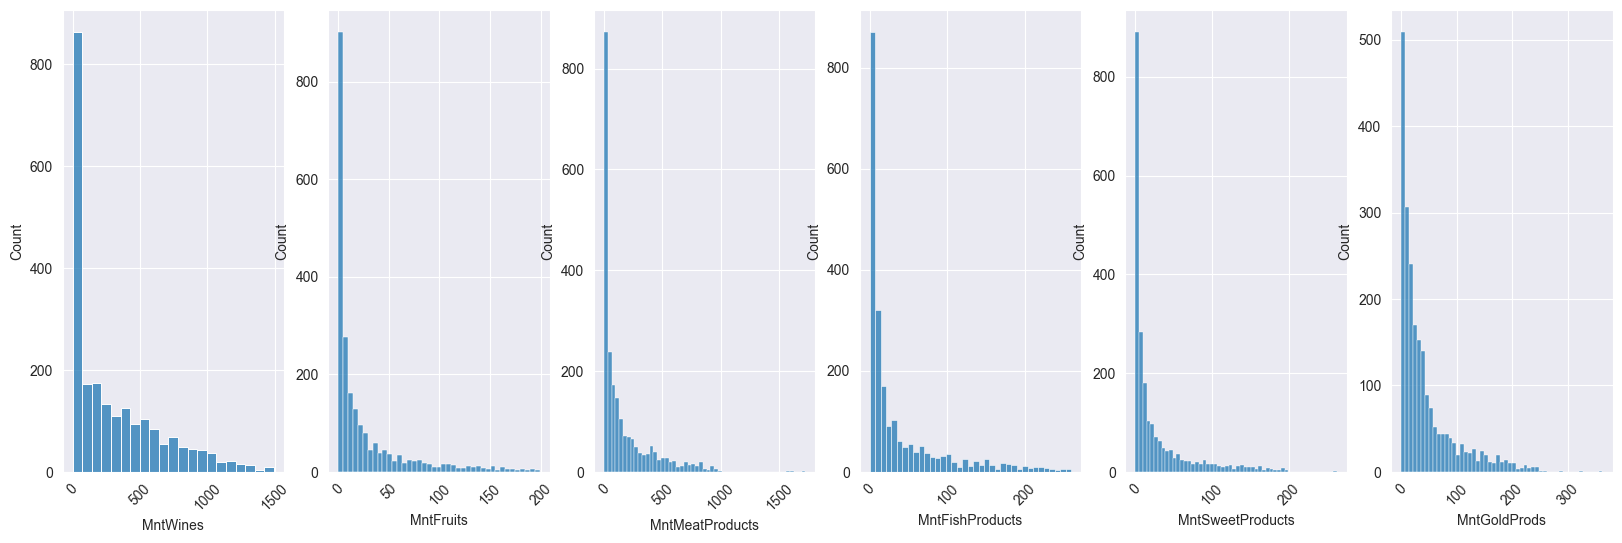

In [21]:
amount_spent = df.columns[df.columns.map(lambda x: 'Mnt' in x)].to_list()
fig, ax = plt.subplots(1, len(amount_spent), figsize=(20, 6))
for col in enumerate(amount_spent):
    sns.histplot(data=df, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)

plt.show()

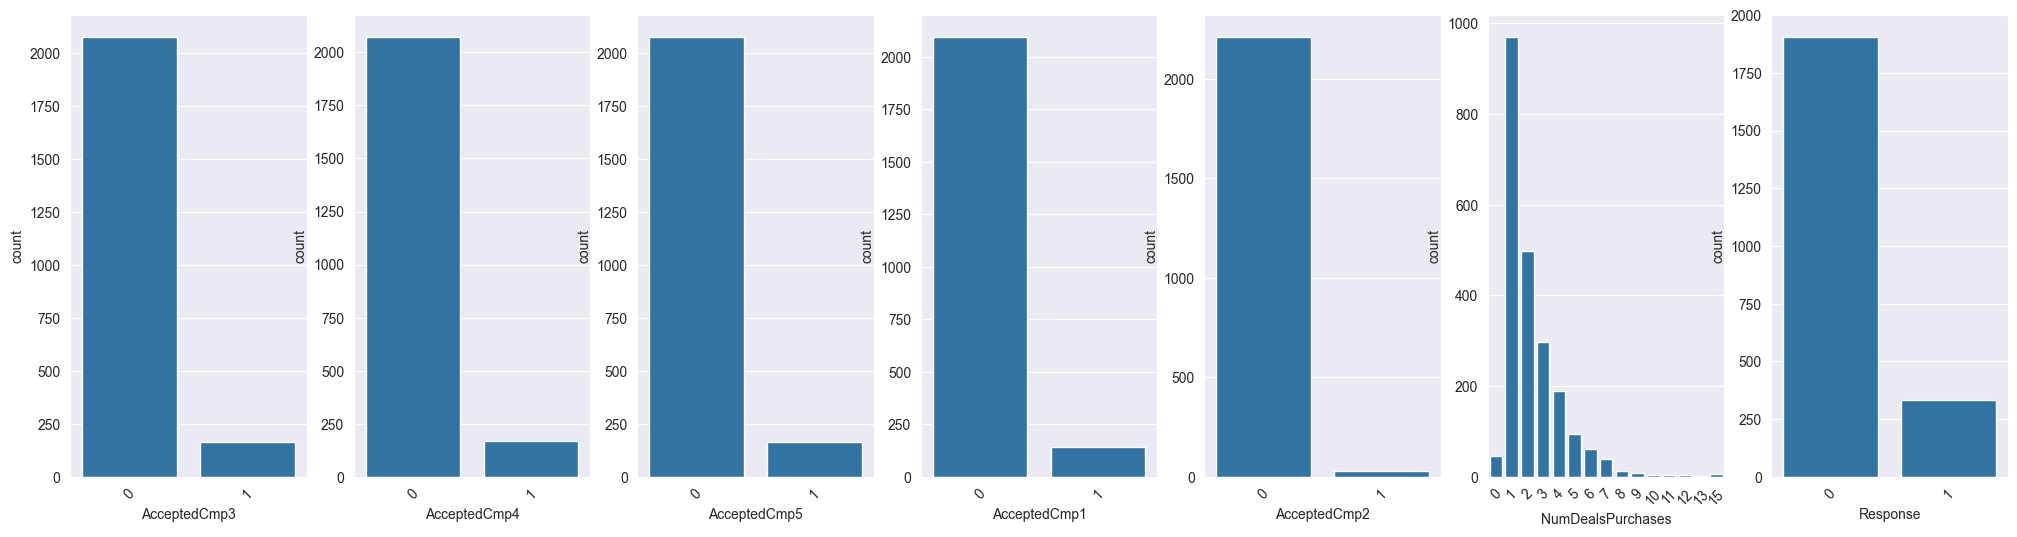

In [23]:
promotions = df.columns[(df.columns.map(lambda x: 'Accepted' in x))].to_list()
promotions.append('NumDealsPurchases')
promotions.append('Response')

fig, ax = plt.subplots(1, len(promotions), figsize=(25, 6))
for col in enumerate(promotions):
    sns.countplot(data=df, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

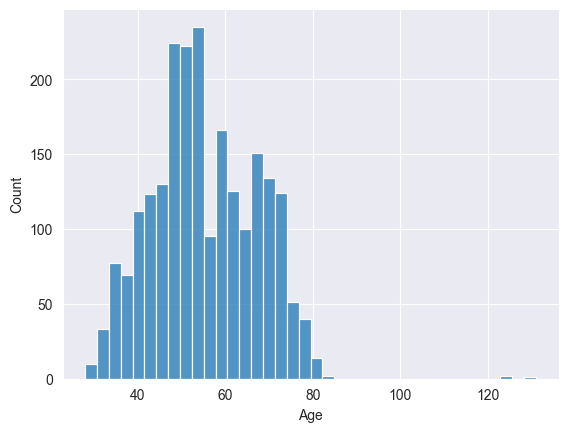

In [25]:
sns.histplot(df['Age'])

# Adding a few features

In [28]:

df['age_at_enroll'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['days_customer_for'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df['num_children'] = df['Kidhome'] + df['Teenhome']
df['has_children'] = df.apply(lambda x : 1 if x['num_children'] > 0 else 0, axis=1)
df['num_total_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['total_Mnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
# add a new column accepted any compaign
df['accepted_any_cmp'] = df.apply(lambda x: x['AcceptedCmp1'] or x['AcceptedCmp2'] or x['AcceptedCmp3'] or x['AcceptedCmp4'] or x['AcceptedCmp5'] or x['Response'], axis=1)


<Axes: xlabel='age_at_enroll', ylabel='Count'>

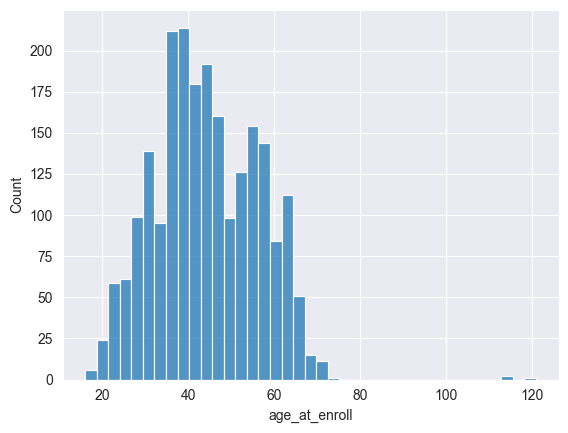

In [29]:
sns.histplot(df['age_at_enroll'])

<Axes: xlabel='age_at_enroll', ylabel='Count'>

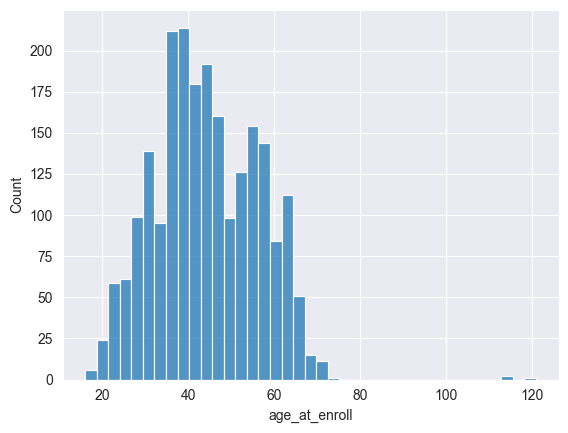

In [30]:
sns.histplot(df['age_at_enroll'])

<Axes: xlabel='Income', ylabel='Count'>

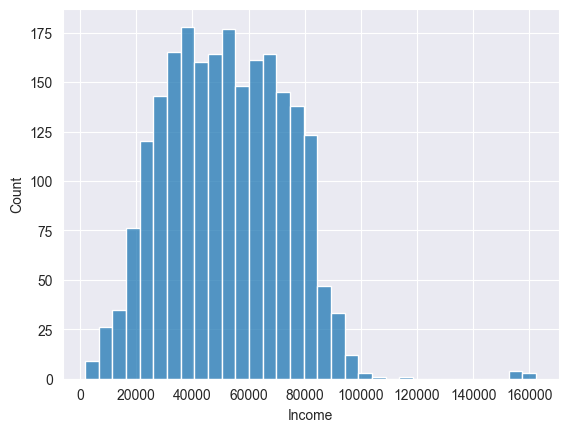

In [36]:
sns.histplot(df["Income"])

# Removing the outliers

In [31]:
# Look at the age at enrollment, there are some outliers, lets have a look at them
df = df.drop(df[df['age_at_enroll'] > 80].index, axis=0)

df = df.drop(df[df['Income'] > 300000].index, axis=0)

<Axes: xlabel='total_Mnt', ylabel='Count'>

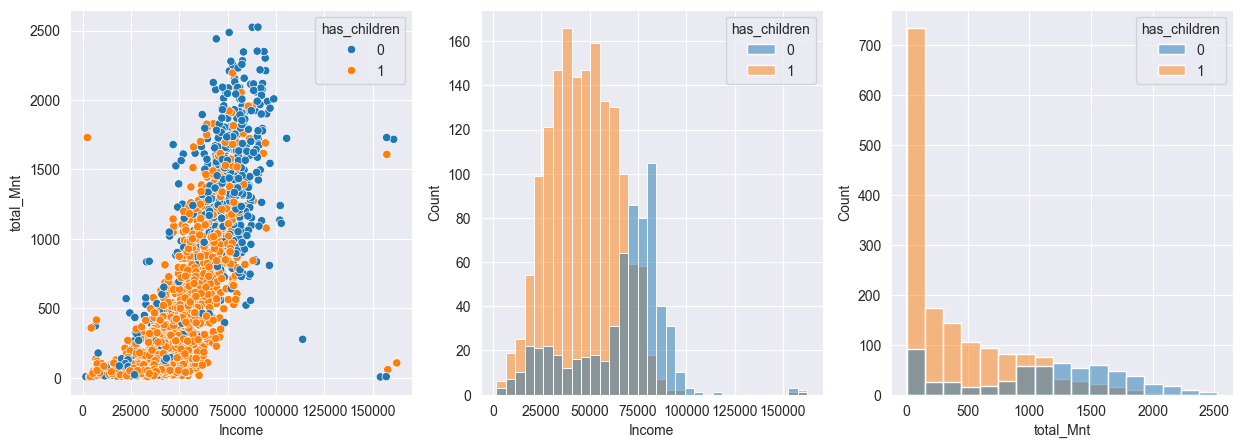

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='Income', y='total_Mnt', hue='has_children', ax=ax[0])
sns.histplot(data=df, x='Income', hue='has_children', ax=ax[1])
sns.histplot(data=df, x='total_Mnt', hue='has_children', ax=ax[2])

Very interesting to see the distribution of income and spend by has_children. Looks like customers with children spend less and has less income

In [33]:
# since there are only 3 customers withh age over 80, I think this might be a mistake in the data, so I will remove them
df['Education'].value_counts()

Education
Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

<Axes: >

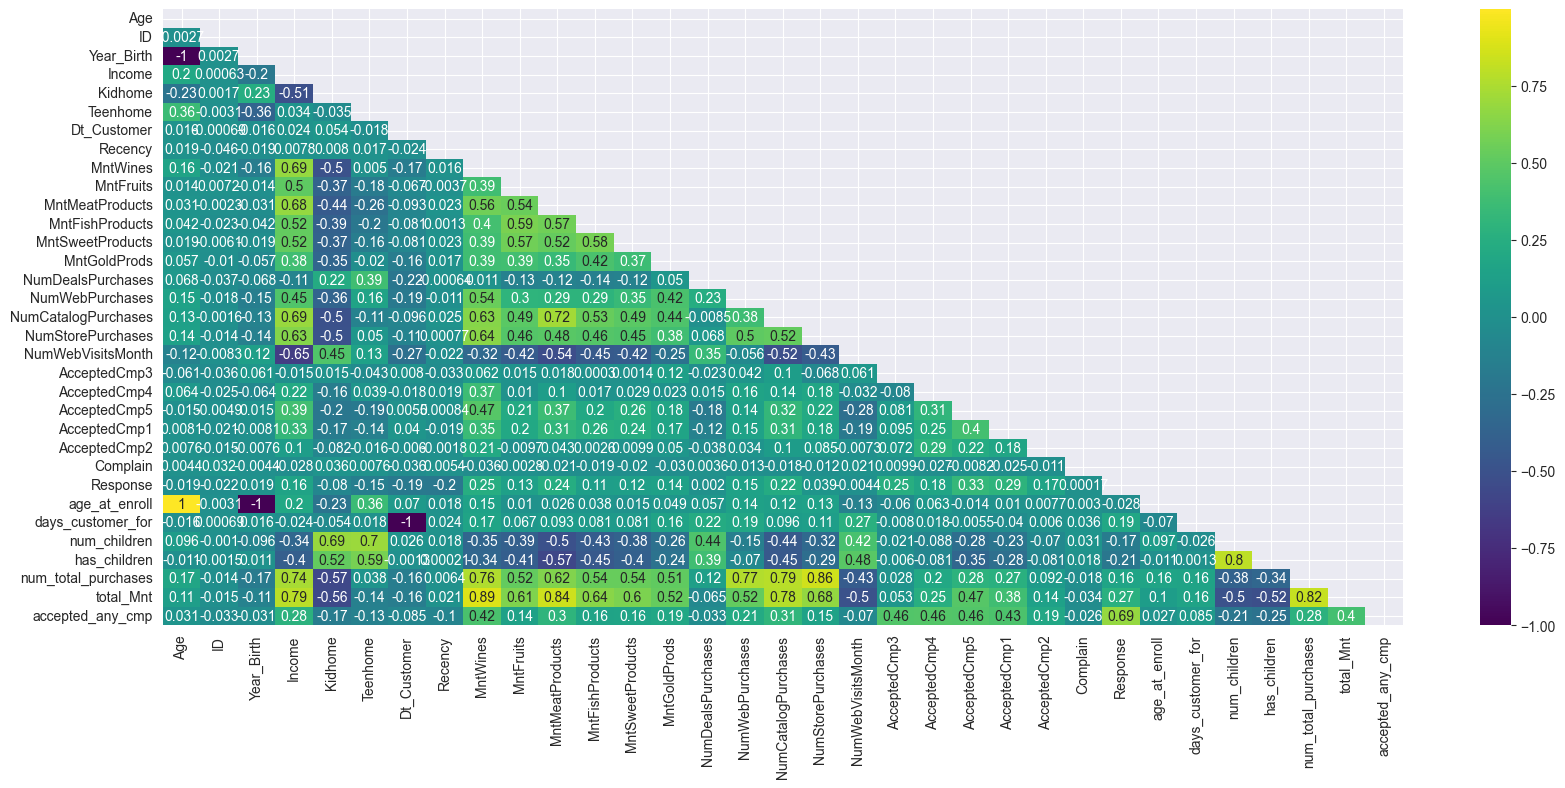

In [34]:
fig, ax = plt.subplots(figsize=(20, 8))
correlation = df[df.columns[(df.dtypes != 'object') & (~df.columns.isin(['Z_CostContact', 'Z_Revenue']))]].corr()

mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, annot=True, vmin=-1, cmap='viridis', mask=mask)

# Step 5: Modelling : using k-Means clustering algorithm

#### Feature Engineering

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [40]:
# lets remove ID, Year_Birth, Z_CostContact, Z_Revenue
df_reduced = df.drop(['ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1)

# rearrange the data columns 
df_reduced = df_reduced[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'age_at_enroll', 'num_children', 'num_total_purchases','total_Mnt', 'has_children', 'days_customer_for', 'accepted_any_cmp', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain',]]
# look at one data to see how the values look like
df_reduced.iloc[1,:]

Education              Graduation
Marital_Status             Single
Income                    46344.0
Kidhome                         1
Teenhome                        1
Recency                        38
MntWines                       11
MntFruits                       1
MntMeatProducts                 6
MntFishProducts                 2
MntSweetProducts                1
MntGoldProds                    6
NumDealsPurchases               2
NumWebPurchases                 1
NumCatalogPurchases             1
NumStorePurchases               2
NumWebVisitsMonth               5
age_at_enroll                  60
num_children                    2
num_total_purchases             4
total_Mnt                      27
has_children                    1
days_customer_for             113
accepted_any_cmp                0
AcceptedCmp1                    0
AcceptedCmp2                    0
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
Response      

In [41]:
df_reduced.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
age_at_enroll            int64
num_children             int64
num_total_purchases      int64
total_Mnt                int64
has_children             int64
days_customer_for        int64
accepted_any_cmp         int64
AcceptedCmp1             int64
AcceptedCmp2             int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
Response                 int64
Complain                 int64
dtype: object

In [42]:
# lets encode the categorical features
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1]),], remainder='passthrough')


df_encoded = ct.fit_transform(df_reduced)

df_encoded[1, :]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 4.6344e+04, 1.0000e+00,
       1.0000e+00, 3.8000e+01, 1.1000e+01, 1.0000e+00, 6.0000e+00,
       2.0000e+00, 1.0000e+00, 6.0000e+00, 2.0000e+00, 1.0000e+00,
       1.0000e+00, 2.0000e+00, 5.0000e+00, 6.0000e+01, 2.0000e+00,
       4.0000e+00, 2.7000e+01, 1.0000e+00, 1.1300e+02, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00])

In [43]:
# Look at the feature names and index, will be used to know which features will be scaled later
for i in enumerate(ct.get_feature_names_out()):
    print(i)

(0, 'encoder__Education_2n Cycle')
(1, 'encoder__Education_Basic')
(2, 'encoder__Education_Graduation')
(3, 'encoder__Education_Master')
(4, 'encoder__Education_PhD')
(5, 'encoder__Marital_Status_Absurd')
(6, 'encoder__Marital_Status_Alone')
(7, 'encoder__Marital_Status_Divorced')
(8, 'encoder__Marital_Status_Married')
(9, 'encoder__Marital_Status_Single')
(10, 'encoder__Marital_Status_Together')
(11, 'encoder__Marital_Status_Widow')
(12, 'encoder__Marital_Status_YOLO')
(13, 'remainder__Income')
(14, 'remainder__Kidhome')
(15, 'remainder__Teenhome')
(16, 'remainder__Recency')
(17, 'remainder__MntWines')
(18, 'remainder__MntFruits')
(19, 'remainder__MntMeatProducts')
(20, 'remainder__MntFishProducts')
(21, 'remainder__MntSweetProducts')
(22, 'remainder__MntGoldProds')
(23, 'remainder__NumDealsPurchases')
(24, 'remainder__NumWebPurchases')
(25, 'remainder__NumCatalogPurchases')
(26, 'remainder__NumStorePurchases')
(27, 'remainder__NumWebVisitsMonth')
(28, 'remainder__age_at_enroll')
(29,

In [44]:
sc = ColumnTransformer(transformers=[('scaler', StandardScaler(), slice(13, 34))], remainder='passthrough')

df_scaled = sc.fit_transform(df_encoded)

df_scaled[1,:]

array([-0.26220256,  1.03262748,  0.90597415, -0.38397129, -0.87106406,
       -0.63643109, -0.71345525, -0.65041372, -0.63163797, -0.72974179,
       -0.16869955, -1.11092123, -0.56896988, -1.16773767, -0.13142124,
        1.35207381,  1.39513902, -1.18619751, -0.9622024 ,  0.63116874,
       -1.19114282,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [45]:
sc.get_feature_names_out()

array(['scaler__x13', 'scaler__x14', 'scaler__x15', 'scaler__x16',
       'scaler__x17', 'scaler__x18', 'scaler__x19', 'scaler__x20',
       'scaler__x21', 'scaler__x22', 'scaler__x23', 'scaler__x24',
       'scaler__x25', 'scaler__x26', 'scaler__x27', 'scaler__x28',
       'scaler__x29', 'scaler__x30', 'scaler__x31', 'scaler__x32',
       'scaler__x33', 'remainder__x0', 'remainder__x1', 'remainder__x2',
       'remainder__x3', 'remainder__x4', 'remainder__x5', 'remainder__x6',
       'remainder__x7', 'remainder__x8', 'remainder__x9',
       'remainder__x10', 'remainder__x11', 'remainder__x12',
       'remainder__x34', 'remainder__x35', 'remainder__x36',
       'remainder__x37', 'remainder__x38', 'remainder__x39',
       'remainder__x40', 'remainder__x41'], dtype=object)

In [46]:
X = df_scaled.copy()

In [47]:
# From the correlation chart, we can see that a lot of the features are correlated, so apply PCA to the dataset would be a good idea to reduce the dimensionality of the dataset
# as well as perform better.

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

X_pca.shape

(2236, 3)

Principal Component Analysis (PCS) reduces the number of variables or features in a data set while still preserving the most important information like major trends or patterns

#### Modelling

In [48]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

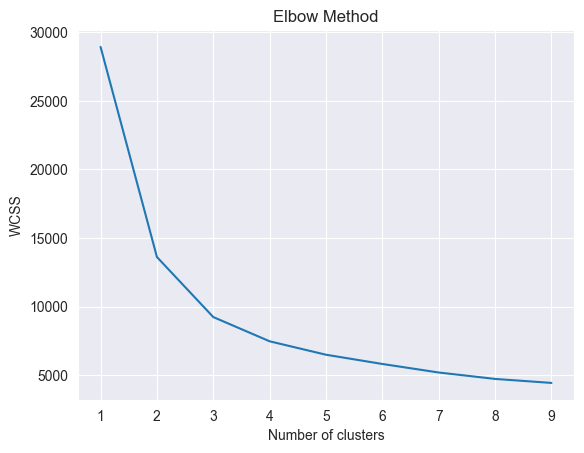

In [49]:

wcss = []

for num_cluster in range(1,10):
    kmeans = KMeans(n_clusters=num_cluster, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# we will use 4 clusters to build the model

In [51]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

D:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


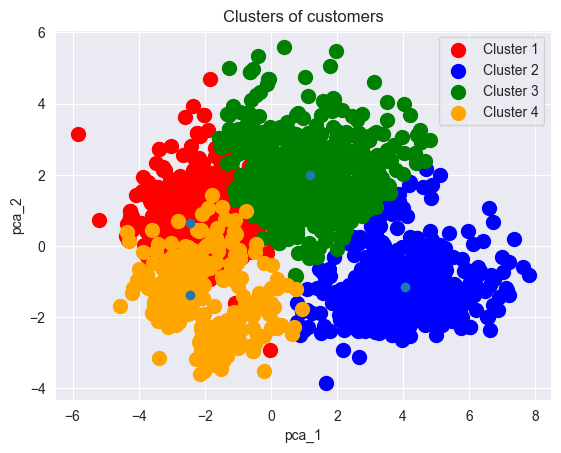

In [52]:
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.title('Clusters of customers')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.legend()
plt.show()

In [53]:
import regex as re 

feature_pos = [ int(re.findall(r'\d+', i)[0]) for i in sc.get_feature_names_out().tolist()]
X_column_names = []

for i in feature_pos:
    X_column_names.append(ct.get_feature_names_out()[i])

X_column_names

['remainder__Income',
 'remainder__Kidhome',
 'remainder__Teenhome',
 'remainder__Recency',
 'remainder__MntWines',
 'remainder__MntFruits',
 'remainder__MntMeatProducts',
 'remainder__MntFishProducts',
 'remainder__MntSweetProducts',
 'remainder__MntGoldProds',
 'remainder__NumDealsPurchases',
 'remainder__NumWebPurchases',
 'remainder__NumCatalogPurchases',
 'remainder__NumStorePurchases',
 'remainder__NumWebVisitsMonth',
 'remainder__age_at_enroll',
 'remainder__num_children',
 'remainder__num_total_purchases',
 'remainder__total_Mnt',
 'remainder__has_children',
 'remainder__days_customer_for',
 'encoder__Education_2n Cycle',
 'encoder__Education_Basic',
 'encoder__Education_Graduation',
 'encoder__Education_Master',
 'encoder__Education_PhD',
 'encoder__Marital_Status_Absurd',
 'encoder__Marital_Status_Alone',
 'encoder__Marital_Status_Divorced',
 'encoder__Marital_Status_Married',
 'encoder__Marital_Status_Single',
 'encoder__Marital_Status_Together',
 'encoder__Marital_Status_Wi

In [54]:
df_reduced['kmeans_cluster'] = y_kmeans

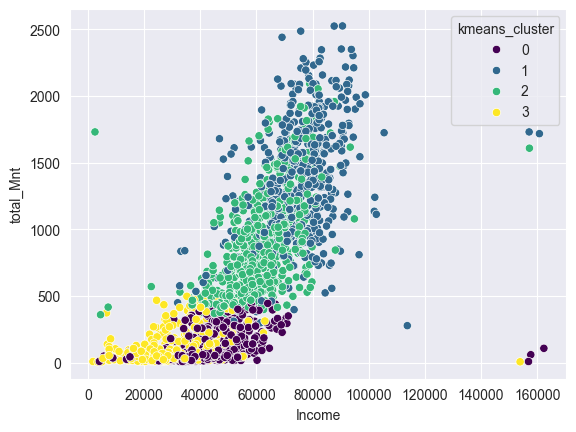

In [55]:
sns.scatterplot(data=df_reduced, x='Income', y='total_Mnt', hue='kmeans_cluster', palette='viridis')
plt.show()

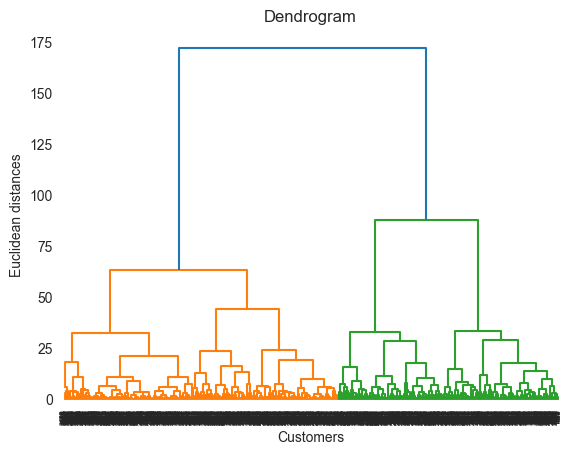

In [56]:
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

 # Predictions

create some dummy data to test the model

In [61]:
import pandas as pd
import numpy as np

# Number of samples
num_samples = 100

# Generate random data
data = {
    'Education': np.random.choice(['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic'], num_samples),
    'Marital_Status': np.random.choice(['Married', 'Single', 'Divorced', 'Widow', 'Together', 'Alone', 'Absurd', 'YOLO'], num_samples),
    'Income': np.random.uniform(2000, 120000, num_samples),
    'Kidhome': np.random.randint(0, 3, num_samples),
    'Teenhome': np.random.randint(0, 3, num_samples),
    'Recency': np.random.randint(0, 100, num_samples),
    'MntWines': np.random.randint(0, 1500, num_samples),
    'MntFruits': np.random.randint(0, 1500, num_samples),
    'MntMeatProducts': np.random.randint(0, 1500, num_samples),
    'MntFishProducts': np.random.randint(0, 1500, num_samples),
    'MntSweetProducts': np.random.randint(0, 1500, num_samples),
    'MntGoldProds': np.random.randint(0, 1500, num_samples),
    'NumDealsPurchases': np.random.randint(0, 30, num_samples),
    'NumWebPurchases': np.random.randint(0, 30, num_samples),
    'NumCatalogPurchases': np.random.randint(0, 30, num_samples),
    'NumStorePurchases': np.random.randint(0, 30, num_samples),
    'NumWebVisitsMonth': np.random.randint(0, 30, num_samples),
    'Complain': np.random.choice([0, 1], num_samples),
    'Z_CostContact': np.random.randint(1, 10, num_samples),
    'Z_Revenue': np.random.randint(1, 50, num_samples),
    'Response': np.random.choice([0, 1], num_samples),
    'Dt_Customer': pd.date_range(start='1/1/2018', periods=num_samples).tolist(),
    'AcceptedCmp1': np.random.choice([0, 1], num_samples),
    'AcceptedCmp2': np.random.choice([0, 1], num_samples),
    'AcceptedCmp3': np.random.choice([0, 1], num_samples),
    'AcceptedCmp4': np.random.choice([0, 1], num_samples),
    'AcceptedCmp5': np.random.choice([0, 1], num_samples),
    'accepted_any_cmp': np.random.choice([0, 1], num_samples),
    'has_children': np.random.choice([0, 1], num_samples),
    'num_children': np.random.randint(0, 3, num_samples),
    'days_customer_for': np.random.randint(0, 365, num_samples),
    'total_Mnt': np.random.randint(0, 1500, num_samples),
    'age_at_enroll': np.random.randint(18, 80, num_samples),
    'num_total_purchases': np.random.randint(0, 30, num_samples)
}

# Create DataFrame
new_data = pd.DataFrame(data)

In [62]:
new_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,accepted_any_cmp,has_children,num_children,days_customer_for,total_Mnt,age_at_enroll,num_total_purchases
0,Graduation,Widow,105311.834417,2,0,96,1460,542,1410,966,...,0,1,0,0,1,1,199,5,51,25
1,Basic,Absurd,54319.315489,0,1,25,652,578,712,1370,...,1,0,0,0,1,0,166,834,62,9
2,Basic,Alone,65497.652277,2,1,25,375,531,1420,953,...,0,0,0,1,1,2,9,605,70,25
3,Master,Divorced,100463.826975,0,1,18,1443,161,1499,8,...,0,1,0,1,1,1,64,293,65,19
4,Basic,YOLO,108763.162390,2,1,68,944,1135,265,688,...,1,0,0,1,1,1,197,679,40,29


In [63]:

# Preprocess new data
new_data_encoded = ct.transform(new_data)
new_data_scaled = sc.transform(new_data_encoded)

# Apply PCA
new_data_pca = pca.transform(new_data_scaled)

# Predict clusters
new_data_clusters = kmeans.predict(new_data_pca)

# Add predicted clusters to new data
new_data['kmeans_cluster'] = new_data_clusters

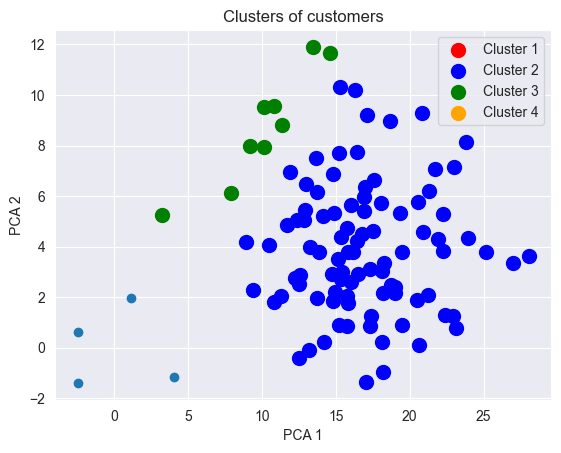

In [65]:

# Visualize the clusters
plt.scatter(new_data_pca[new_data_clusters == 0, 0], new_data_pca[new_data_clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(new_data_pca[new_data_clusters == 1, 0], new_data_pca[new_data_clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(new_data_pca[new_data_clusters == 2, 0], new_data_pca[new_data_clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.sca

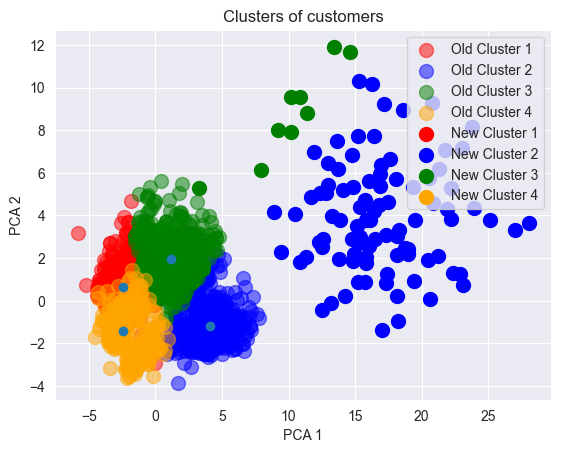

Evaluation of the prediction

In [64]:
from sklearn import metrics

# Silhouette Score
silhouette_score = metrics.silhouette_score(new_data_pca, new_data_clusters)
print(f'Silhouette Score: {silhouette_score}')

# Calinski-Harabasz Index
calinski_harabasz_score = metrics.calinski_harabasz_score(new_data_pca, new_data_clusters)
print(f'Calinski-Harabasz Index: {calinski_harabasz_score}')

# Davies-Bouldin Index
davies_bouldin_score = metrics.davies_bouldin_score(new_data_pca, new_data_clusters)
print(f'Davies-Bouldin Index: {davies_bouldin_score}')

Silhouette Score: 0.31911222966983543
Calinski-Harabasz Index: 20.085461261355064
Davies-Bouldin Index: 1.1046684667760096
